# Data visualization

This script generates all kinds of figures and pre-processes the data to a very limited extent (binarization of very rare features).

## Data loading

### Dataset loading

In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt


data_file_name = "dataset_90_days_started_09_07_23"
data_path_format = '/workspaces/msc_thesis/data/final_data/{data_file_name}.csv'
data_path = data_path_format.format(data_file_name=data_file_name)
print(f'{data_path=}')


df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

print(f'{len(df)=}.')
print(f'{len(df.columns)=}\n')
print(f'{df.columns=}')

df.describe()


data_path='/workspaces/msc_thesis/data/final_data/dataset_90_days_started_09_07_23.csv'
len(df)=1815972.
len(df.columns)=92

df.columns=Index(['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At',
       'PullRequestIsMerged', 'SubmitterIsFirstTimeContributor',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In)',
       'FirstOrderDegreeCentrality

,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In),...,IntraProjectSubmitterIssueCommentCount,SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator,SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter,SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter,EcosystemExperienceSubmitterIssueSubmissionCount,EcosystemExperienceSubmitterIssueCommentCount,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1815972.0,1815972.0,...,1815972.0,1815972.0,1815972.0,1815972.0,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06
mean,1.474751e+08,5.198276e+06,3.807207e+03,3.190111e+04,4.947501e+00,7.211006e+01,4.611308e+02,3.701646e+02,0.0,0.0,...,0.0,0.0,0.0,0.0,5.430257e+00,4.042333e+01,3.884548e-01,1.792435e+00,3.920011e-01,2.337505e+00
std,1.004294e+08,8.100370e+06,8.071615e+03,1.399335e+05,7.283362e+01,1.149065e+03,2.831760e+03,2.487856e+03,0.0,0.0,...,0.0,0.0,0.0,0.0,1.243782e+01,1.031914e+02,2.779274e+00,1.748412e+01,3.374643e+00,2.131737e+01
min,6.870000e+02,1.000000e+00,1.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.807322e+07,4.631570e+05,1.000000e+02,5.290000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.371940e+08,1.620265e+06,5.480000e+02,9.799167e+02,1.000000e+00,0.000000e+00,9.000000e+00,4.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.278026e+08,6.384100e+06,2.817000e+03,7.328350e+03,3.000000e+00,1.100000e+01,1.410000e+02,1.140000e+02,0.0,0.0,...,0.0,0.0,0.0,0.0,5.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.617756e+08,5.976123e+07,8.297600e+04,4.489490e+06,1.000000e+04,8.376800e+04,1.012830e+05,1.234880e+05,0.0,0.0,...,0.0,0.0,0.0,0.0,2.335000e+03,7.676000e+03,3.730000e+02,1.102000e+03,7.410000e+02,2.764000e+03


### Meta stuff

In [48]:

from python_proj.utils.util import safe_save_fig

# The number of headers containing metadata; i.e., the stuff that's unusable for inference.
meta_header_count = 5
pr_merged_key = 'PullRequestIsMerged'
first_time_contributor_key = 'SubmitterIsFirstTimeContributor'

# Figures.
figure_base_path = f"/workspaces/msc_thesis/data/figures/modelling/{data_file_name}/"

if not os.path.exists(figure_base_path):
    os.makedirs(figure_base_path)
print(f'{figure_base_path=}')


figure_base_path='/workspaces/msc_thesis/data/figures/modelling/dataset_90_days_started_09_07_23/'


### First-time contributors

Adds the correct first-time contributor data to the dataframe as datasets generated with the ``sliding window 3`` code are incorrect.

In [49]:


ftc_file_name = "dataset_90_days_started_28_06_23"
ftc_data_path = f'/workspaces/msc_thesis/data/final_data/{ftc_file_name}.csv'
print(f'{ftc_data_path=}\n')

ftc_flag_data: pd.DataFrame = pd.read_csv(ftc_data_path)
ftc_flag_data = ftc_flag_data[['ID', first_time_contributor_key]]

old_counts = df[first_time_contributor_key].value_counts()
print(f'Old/Incorrect:\n{old_counts}')

df = df.merge(ftc_flag_data, how='left', on='ID', suffixes=("_incorrect", ""))
old_ftc_key = f'{first_time_contributor_key}_incorrect'
df = df.drop(old_ftc_key, axis=1)

new_counts = df[first_time_contributor_key].value_counts()
print(f'\nNew:\n{new_counts}')

diff = new_counts - old_counts
print(f'\nDifference:\n{diff}')

ftc_data_path='/workspaces/msc_thesis/data/final_data/dataset_90_days_started_28_06_23.csv'



Old/Incorrect:
SubmitterIsFirstTimeContributor
False    1064832
True      751140
Name: count, dtype: int64

New:
SubmitterIsFirstTimeContributor
False    1293737
True      536234
Name: count, dtype: int64

Difference:
SubmitterIsFirstTimeContributor
False    228905
True    -214906
Name: count, dtype: int64


## Demographics Visualization

### Pulls over time

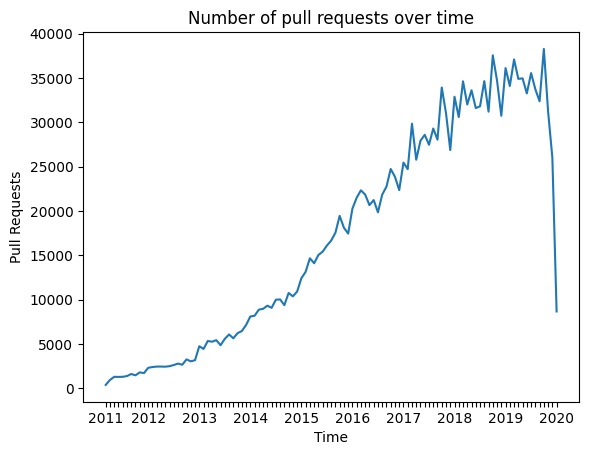

In [50]:
dates = pd.to_datetime(df['Closed At'], format="%Y-%m-%dT%H:%M:%SZ")

pr_count_per_year_month = dates.groupby(
    [dates.dt.year, dates.dt.month]).count()
axs = pr_count_per_year_month.plot(kind="line")

# Fixes x-ticks to be less cluttered.
xticks_years = []
last_year = -1
for (year, _) in pr_count_per_year_month.keys():
    if last_year != year:
        last_year = year
        xticks_years.append(year)
    else:
        xticks_years.append('')
axs.set_xticks(range(len(xticks_years)))
axs.set_xticklabels(xticks_years)

axs.set_xlabel("Time")
axs.set_ylabel("Pull Requests")
axs.set_title("Number of pull requests over time")

output_path = f'{figure_base_path}/demographics/pr_count_per_year_month.png'
safe_save_fig(output_path)

plt.show()


### Pulls per project

percentile=98
percentile_index=19650
Top project count: 402
Pull Requests below 98th percentile: 942229/1829971 (51.489%)

pulls_cap=693
capped_top_pulls_count=278586
bottom_pull_count + capped_top_pulls_count=1220815


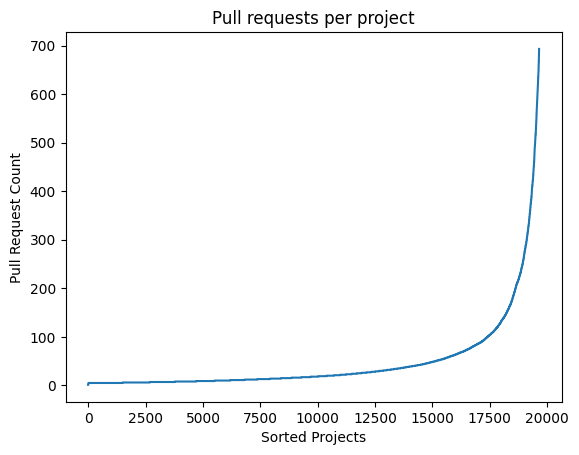

In [51]:
import math


def __plot(__df, figure_name: str):
    plt.clf()
    axs = __df.plot(kind="line", use_index=False)
    axs.set_xlabel("Sorted Projects")
    axs.set_ylabel("Pull Request Count")
    axs.set_title("Pull requests per project")
    output_path = f'{figure_base_path}/demographics/{figure_name}.png'
    safe_save_fig(output_path)



# all data plot
pr_count_per_project = dates.groupby(df['Project Name']).count()
pr_count_per_project = pr_count_per_project.sort_values()
__plot(pr_count_per_project, "prs_per_project_all")

# up to 97th Percentile plot
project_count = len(pr_count_per_project)
# NOTE: with the 74th percentile the PR counts of the capped
# elite and the rest are approximately equal. The total number
# of entries is then 479.801.
percentile = 98
print(f'{percentile=}')
percentile_index = math.floor(project_count * percentile / 100)
print(f'{percentile_index=}')
print(f'Top project count: {project_count - percentile_index}')
perc_data = pr_count_per_project.iloc[:percentile_index]
__plot(perc_data, f"prs_per_project_up_to_{percentile}th_percentile")

# Printing some stats.
total_pull_count = sum(pr_count_per_project.values)
bottom_pull_count = sum(perc_data.values)
ratio = 100 * bottom_pull_count / total_pull_count
print(f'Pull Requests below {percentile}th percentile: '
        + f'{bottom_pull_count}/{total_pull_count} ({ratio:.03f}%)\n')

# Calcualtes cap
pulls_cap = max(perc_data.values)
capped_top_pulls_count = pulls_cap * (project_count - percentile_index)
print(f'{pulls_cap=}')
print(f'{capped_top_pulls_count=}')
print(f'{bottom_pull_count + capped_top_pulls_count=}')




## Pulls per project subsampling

In [52]:
top_projects = pr_count_per_project.iloc[percentile_index:]
print(f'{len(top_projects)=}')

# Samples top projects.
df = df.groupby('Project Name').apply(lambda x: x.sample(min(pulls_cap, len(x)))
                                      if x.name in top_projects else x)

print(f'Sub-sampled df length: {len(df)}')


len(top_projects)=402


Sub-sampled df length: 1220815


## Predictor histograms

### Create Histograms for everything

PullRequestIsMerged
ControlIntegratedBySameUser
ControlPullRequestLifeTimeInMinutes
ControlPullRequestHasComments
ControlNumberOfCommitsInPullRequest
ControlPullRequestHasCommentByExternalUser
ControlHasHashTagInDescription
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToCommenter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCom

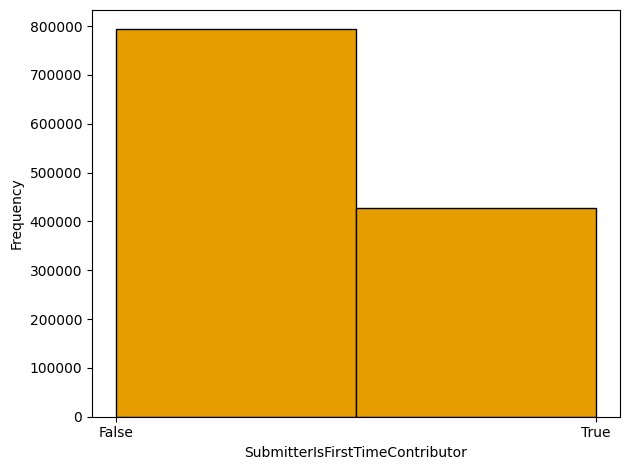

In [53]:
import copy

default_plot_settings = {
    'edgecolor': 'black',
    'color': "#e69d00"
}

default_plot_settings_2 = copy.deepcopy(default_plot_settings)
default_plot_settings_2['color'] = "#56b3e9"


def __fix_x_label_fontsize(__column):
    # Adjusts x-label's fontsize to fit the text.
    fig = plt.gcf()
    fig_width = fig.get_figwidth()
    xlabel_fontsize = int(fig_width * 100 / len(__column))
    ax = plt.gca()
    orig_fontsize = ax.xaxis.label.get_fontsize()
    ax.xaxis.label.set_fontsize(min(xlabel_fontsize, orig_fontsize))


def create_histogram(_df: pd.DataFrame, _column: str,
                     subfolder_name: str = "",
                     show_without_zeroes: bool = False):
    can_create_feature_histograms = True

    if not can_create_feature_histograms:
        return

    binary_fields = _df.select_dtypes(exclude='number').columns

    print(_column)
    plt.clf()
    entries = _df[_column]

    if _column in binary_fields:
        entries = _df[_column].replace({False: 0, True: 1})
        plt.xticks([0, 1], ['False', 'True'])
        plt.hist(entries, bins=2, **default_plot_settings)
        plt.ylabel('Frequency')
    # elif __column in shown_fields_without_zeroes:
    elif show_without_zeroes:
        _, bins, _ = plt.hist(entries, bins=30, alpha=1,
                              label="All Data", **default_plot_settings)
        ax: plt.Axes = plt.gca()
        ax.set_ylabel("Frequency")
        ax.set_xlabel(_column)
        __fix_x_label_fontsize(_column)

        filtered_data = _df[_column][_df[_column] != 0]
        ax2 = ax.twinx()

        ax2.hist(filtered_data, bins, alpha=0.5,
                 label='Excl. zeroes', **default_plot_settings_2)
        ax2.set_ylabel("Frequency (x > 0)")
        ax2.set_zorder(10)
        plt.tight_layout()
    else:
        plt.hist(entries, bins=30, **default_plot_settings)
        plt.ylabel('Frequency')

    plt.xlabel(_column)
    __fix_x_label_fontsize(_column)
    plt.tight_layout()

    output_path = f"{figure_base_path}/distributions/{subfolder_name}/{_column}.png"
    safe_save_fig(output_path)


def create_predictor_histograms(__df: pd.DataFrame, subfolder_name: str = ""):
    # Iterate over the columns and generate histograms
    for column in __df.columns[meta_header_count:]:
        create_histogram(__df, column, subfolder_name, show_without_zeroes=True)


create_predictor_histograms(df, subfolder_name="untransformed")


### Histograms Success Rate

This is done separately as success rate has a meaningfull zero score, whereas all observations without any PR submissions are also assigned 0. 

IntraProjectSubmitterPullRequestSuccessRate
EcosystemExperienceSubmitterPullRequestSuccessRate
DependencyEcosystemExperienceSubmitterPullRequestSuccessRate
InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate


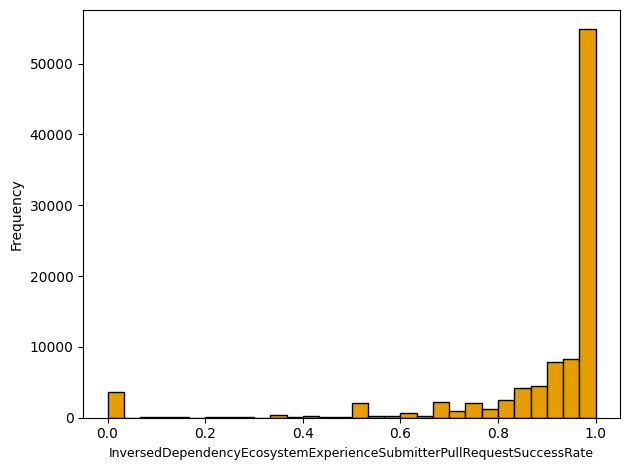

In [54]:
import regex as re

ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]

for field in ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"
    tmp_df = df[df[related_count_field] != 0]
    create_histogram(tmp_df, field, subfolder_name="success_rate")

## Transformation

Highly skewed data is terrible for logistic regresson and might be the cause for highly non-linear partial dependence in random forest. Therefore, some of the data is transformed.

### Transform visualization success ratios

/tmp/ipykernel_78175/3616819763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


IntraProjectSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_78175/3616819763.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


IntraProjectSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_78175/3616819763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


EcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_78175/3616819763.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


EcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_78175/3616819763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_78175/3616819763.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


DependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2
DependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_78175/3616819763.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_78175/3616819763.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2
InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate^2


/tmp/ipykernel_78175/3616819763.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


cbrt(InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)
cbrt(InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)
/tmp/ipykernel_78175/3616819763.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + IntraProjectSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + EcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + DependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


log(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)
log(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate)


/tmp/ipykernel_78175/3616819763.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[field_name] = test_df[field].apply(transform)


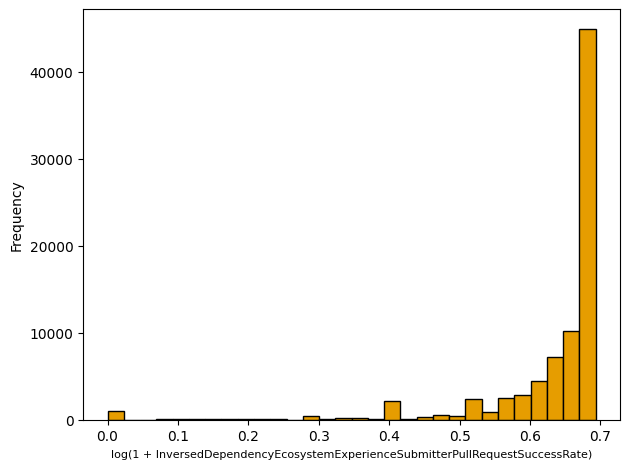

In [55]:
import numpy as np

success_ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]

# squared-transform
for field in success_ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"

    def transform(x): return x ** 2

    # Excludes zero PR count entries.
    test_df = df[df[related_count_field] != 0]
    field_name = f'{field}^2'
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "squared_success_ratio_no_zero_count")

    # Excludes one  PR entries as well.
    test_df = df[df[related_count_field] > 1]
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "squared_success_ratio_no_zero_or_one_count")
    

# cbrt-transform
for field in success_ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"

    def transform(x): return np.cbrt(x)

    # Excludes zero PR count entries.
    test_df = df[df[related_count_field] != 0]
    field_name = f'cbrt({field})'
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "cbrt_success_ratio_no_zero_count")

    # Excludes one  PR entries as well.
    test_df = df[df[related_count_field] > 1]
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "cbrt_success_ratio_no_zero_or_one_count")

# log-transform
for field in success_ratio_fields:
    related_count_field = field[:-len('SuccessRate')] + "SubmissionCount"

    def transform(x): return np.log(1 + x)

    # Excludes zero PR count entries.
    test_df = df[df[related_count_field] != 0]
    field_name = f'log(1 + {field})'
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "log_success_ratio_no_zero_count")

    # Excludes one  PR entries as well.
    test_df = df[df[related_count_field] > 1]
    test_df[field_name] = test_df[field].apply(transform)
    create_histogram(test_df, field_name,
                     "log_success_ratio_no_zero_or_one_count")

### Transform visualization count data

Visualizes the effect of various transformations on the data.

['ControlPullRequestLifeTimeInMinutes', 'ControlNumberOfCommitsInPullRequest', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-Put)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToCommenter-Put)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)', 'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToSubmitter-Put)', 'FirstOrderDegreeCentrality(PRCommenterToSubmitter.PRIntegratorToSubmitter-In)', 'FirstOrder

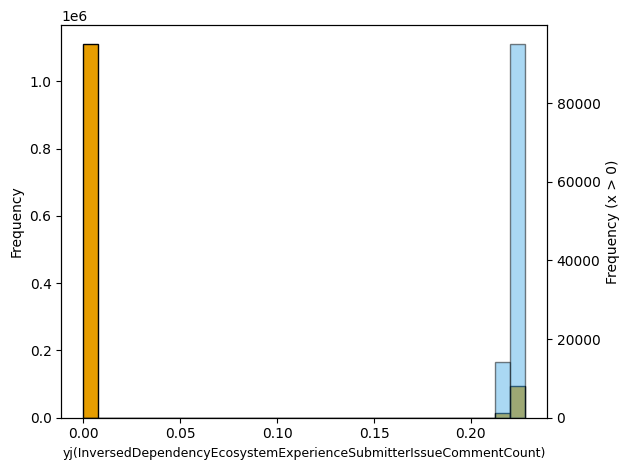

In [42]:
import numpy as np
import regex as re
from scipy.stats import yeojohnson


non_meta_headers = df.columns[meta_header_count:]

continuous_fields = df[non_meta_headers].select_dtypes(
    include='number').columns
continuous_fields = [field for field in continuous_fields if len(
    re.findall(r'.*SuccessRate.*', field)) == 0]

print(continuous_fields)

# Does this for log-transform.
print("\nLog Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = ''
    if mn >= 1:
        field_name = f'log({field})'
        test_df[field_name] = df[field].apply(lambda x: np.log(x))
    elif mn < 1:
        field_name = f'log(1 + {field})'
        test_df[field_name] = df[field].apply(lambda x: np.log(1 + x))
    else:
        ValueError()
    create_histogram(test_df, field_name, 'log_transformed',
                     show_without_zeroes=True)

# Does this for square root.
print("\nSquare root Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = ''
    if mn >= 1:
        field_name = f'sqrt({field})'
        test_df[field_name] = df[field].apply(lambda x: np.sqrt(x))
    elif mn < 1:
        field_name = f'sqrt(1 + {field})'
        test_df[field_name] = df[field].apply(lambda x: np.sqrt(1 + x))
    else:
        ValueError()
    create_histogram(test_df, field_name, 'sqrt_transformed',
                     show_without_zeroes=True)


# Does this reciprocal-transform.
print("\nReciprocal Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = ''
    if mn >= 1:
        field_name = f'recip({field})'
        test_df[field_name] = df[field].apply(lambda x: 1 / x)
    elif mn < 1:
        field_name = f'recip(1 + {field})'
        test_df[field_name] = df[field].apply(lambda x: 1 / (1 + x))
    else:
        ValueError()
    create_histogram(test_df, field_name, 'recip_transformed',
                     show_without_zeroes=True)


# Does this squared-transform.
print("\n Squared Transform:")
for field in continuous_fields:
    mn = df[field].min()
    print(f'{field}: {mn=}')
    test_df = pd.DataFrame()
    field_name = f'{field}^2'
    test_df[field_name] = df[field].apply(lambda x: x ** 2)
    create_histogram(test_df, field_name, 'squared_transformed',
                     show_without_zeroes=True)


print("\nYeo-Johnson:")
for field in continuous_fields:
    test_df = pd.DataFrame()
    field_name = f'yj({field})'
    test_df[field_name], _lambda = yeojohnson(df[field])
    print(f'{field}: {_lambda=}')
    create_histogram(test_df, field_name,
                     'yeo_johnson_transform', show_without_zeroes=True)


### Application of log-transformation

All of the fields are log-transformed.

In [43]:
for field in continuous_fields:
    field_name = f'log(1 + {field})'
    df[field_name] = df[field].apply(lambda x: np.log(1 + x))
    df = df.drop(field, axis=1)


## Rare Event Handling

### Predictor Zero Counts

Counts how many fields have partial zero data to see if they are worth including in this study

In [44]:
import regex as re
from typing import Callable

zeroes = pd.DataFrame()
zeroes['zeroes'] = df.eq(0).sum()
zeroes['non_zeroes'] = len(df) - zeroes['zeroes']
zeroes['percentage_zeroes'] = (zeroes['zeroes'] / len(df)) * 100

binary_fields = df.select_dtypes(exclude='number').columns
ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]


def get_fields_with_requirements(req: Callable[[str, dict], bool]) -> list[str]:
    included_rows = []
    for name, row_data in zeroes.iterrows():
        # We're only interested in continuous data here.
        # The ratio fields have a meaningful 0.
        if name in binary_fields or name in ratio_fields:
            continue

        if req(name, row_data):
            included_rows.append(name)
            print(
                f'{name}: {row_data["zeroes"]:.0f} zeroes, {row_data["non_zeroes"]:.0f} non-zeroes ({row_data["percentage_zeroes"]:.03f}% zeroes).')

    return included_rows


print("Non-existent events:")
non_existent_events = get_fields_with_requirements(lambda _, row_data:
                                                   row_data['percentage_zeroes'] == 100)

too_rare_cutoff = 95
print(f"\nToo rare events ({too_rare_cutoff}+% zeroes):")
too_rare_events = get_fields_with_requirements(lambda name, row_data:
                                               row_data['percentage_zeroes'] > too_rare_cutoff
                                               and name not in non_existent_events)
too_rare_events.extend(non_existent_events)


rare_cutoff = 70
print(f"\nRare events ({rare_cutoff}+% zeroes):")
rare_events = get_fields_with_requirements(lambda name, row_data:
                                           row_data['percentage_zeroes'] > rare_cutoff
                                           and name not in too_rare_events)

print("\nNon-rare events:")
non_rare_events = get_fields_with_requirements(lambda name, _:
                                               name not in rare_events
                                               and name not in too_rare_events)

print("\nCounts:")
print(f'{len(too_rare_events)=}')
print(f'{len(rare_events)=}')
print(f'{len(non_rare_events)=}')


Non-existent events:
log(1 + FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put)): 1220815 zeroes, 0 non-zeroes (100.000% zeroes).
log(1 + FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In)): 1220815 zeroes, 0 non-zeroes (100.000% zeroes).
log(1 + FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-Put)): 1220815 zeroes, 0 non-zeroes (100.000% zeroes).
log(1 + FirstOrderDegreeCentrality(PRCommenterToSubmitter.PRIntegratorToSubmitter-Put)): 1220815 zeroes, 0 non-zeroes (100.000% zeroes).
log(1 + FirstOrderDegreeCentrality(PRCommenterToSubmitter.PRCommenterToSubmitter-Put)): 1220815 zeroes, 0 non-zeroes (100.000% zeroes).
log(1 + FirstOrderDegreeCentrality(PRCommenterToSubmitter.PRCommenterToCommenter-In)): 1220815 zeroes, 0 non-zeroes (100.000% zeroes).
log(1 + FirstOrderDegreeCentrality(PRCommenterToSubmitter.PRCommenterToCommenter-Put)): 1220815 zeroes, 0 non-zeroes (100.000% zeroes).
log(1 + FirstOrderDegreeC

### Rare Events Handling

Removes fields that are too rare, and binarizes those that are very rare.

bin(log(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator))
bin(log(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter))
bin(log(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount))
bin(log(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount))
bin(log(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount))
bin(log(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount))
bin(log(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount))
bin(log(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount))
bin(log(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount))
bin(log(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount))


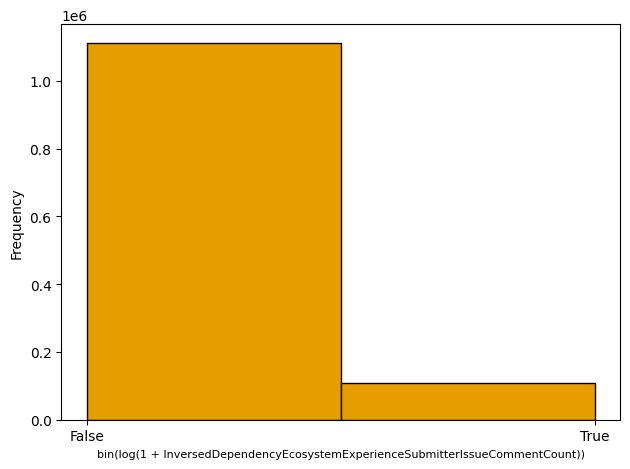

In [45]:
# Too rare events are dropped.
df = df.drop(too_rare_events, axis=1)

# Very rare events are binarized.
for field in rare_events:
    bin_field_key = f'bin({field})'
    df[bin_field_key] = df[field].apply(lambda x: x > 0)
    df = df.drop(field, axis=1)
    create_histogram(df, bin_field_key, subfolder_name="bin_transformed")


## Finalization

### Stores processed data file

In [46]:
output_file_name = f'{data_file_name}_preprocessed'
output_path = data_path_format.format(data_file_name=output_file_name)
df.to_csv(output_path)

df.describe()

,ID,Submitter ID,PR Number,IntraProjectSubmitterPullRequestSuccessRate,EcosystemExperienceSubmitterPullRequestSuccessRate,DependencyEcosystemExperienceSubmitterPullRequestSuccessRate,InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,log(1 + ControlPullRequestLifeTimeInMinutes),log(1 + ControlNumberOfCommitsInPullRequest),log(1 + FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)),log(1 + FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put)),log(1 + FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)),log(1 + FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)),log(1 + ControlIntraProjectPullRequestExperienceOfIntegrator),log(1 + IntraProjectSubmitterPullRequestSubmissionCount),log(1 + IntraProjectSubmitterPullRequestCommentCount),log(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount),log(1 + EcosystemExperienceSubmitterPullRequestCommentCount),log(1 + EcosystemExperienceSubmitterIssueSubmissionCount),log(1 + EcosystemExperienceSubmitterIssueCommentCount)
count,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06,1.220815e+06
mean,1.473880e+08,5.088607e+06,8.091943e+02,5.030167e-01,4.029176e-01,1.162057e-01,7.063452e-02,6.435031e+00,1.090638e+00,1.181742e+00,2.333425e+00,2.092862e+00,1.910421e+00,2.496610e+00,1.258014e+00,1.081209e+00,1.113509e+00,1.187649e+00,9.831200e-01,1.869907e+00
std,9.957882e+07,7.966624e+06,2.292551e+03,4.710606e-01,4.523543e-01,3.126551e-01,2.482626e-01,3.452652e+00,6.584894e-01,1.762824e+00,2.525226e+00,2.542021e+00,2.420192e+00,1.561780e+00,1.371928e+00,1.410774e+00,1.462226e+00,1.591892e+00,1.119042e+00,1.794795e+00
min,1.153000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.652930e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.925636e+07,4.655820e+05,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.636270e+00,6.931472e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.386294e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.368158e+08,1.631348e+06,2.000000e+02,6.842105e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.797903e+00,6.931472e-01,0.000000e+00,1.609438e+00,0.000000e+00,0.000000e+00,2.484907e+00,6.931472e-01,0.000000e+00,6.931472e-01,0.000000e+00,6.931472e-01,1.609438e+00
75%,2.262503e+08,6.251703e+06,6.850000e+02,1.000000e+00,9.393939e-01,0.000000e+00,0.000000e+00,8.985295e+00,1.386294e+00,2.197225e+00,4.406719e+00,4.204693e+00,3.931826e+00,3.663562e+00,2.302585e+00,2.079442e+00,1.945910e+00,2.197225e+00,1.791759e+00,3.295837e+00
max,3.617756e+08,5.973444e+07,8.297600e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.531725e+01,9.210440e+00,1.133582e+01,1.136871e+01,1.172391e+01,1.150730e+01,8.357728e+00,7.438972e+00,7.576610e+00,6.923629e+00,7.168580e+00,7.756195e+00,8.945984e+00
